In [1]:
# Python cell
import os, glob, pprint
base = "/kaggle/input/uav-dataset"
dataset_entries = []
for d in os.listdir(base):
    p = os.path.join(base, d)
    if os.path.isdir(p):
        files = []
        for root, _, filenames in os.walk(p):
            for f in filenames:
                files.append(os.path.join(root, f))
        dataset_entries.append((d, files[:50]))  # show up to 50 files per dataset
pprint.pprint(dataset_entries)
print("\nIf you uploaded two zip files, expect to see something like '/kaggle/input/<your-dataset>/<something>.zip'")


[('labels-20240430T212029Z-001',
  ['/kaggle/input/uav-dataset/labels-20240430T212029Z-001/labels/val.cache',
   '/kaggle/input/uav-dataset/labels-20240430T212029Z-001/labels/test.cache',
   '/kaggle/input/uav-dataset/labels-20240430T212029Z-001/labels/train.cache',
   '/kaggle/input/uav-dataset/labels-20240430T212029Z-001/labels/val/f450_1757.txt',
   '/kaggle/input/uav-dataset/labels-20240430T212029Z-001/labels/val/multi_1453.txt',
   '/kaggle/input/uav-dataset/labels-20240430T212029Z-001/labels/val/f450_1220.txt',
   '/kaggle/input/uav-dataset/labels-20240430T212029Z-001/labels/val/phantom_1587.txt',
   '/kaggle/input/uav-dataset/labels-20240430T212029Z-001/labels/val/f450_1087.txt',
   '/kaggle/input/uav-dataset/labels-20240430T212029Z-001/labels/val/f450_1053.txt',
   '/kaggle/input/uav-dataset/labels-20240430T212029Z-001/labels/val/f450_193.txt',
   '/kaggle/input/uav-dataset/labels-20240430T212029Z-001/labels/val/plane_192.txt',
   '/kaggle/input/uav-dataset/labels-20240430T2120

In [2]:
!rm -rf /kaggle/working/dataset


In [3]:
%%bash
set -e

KINPUT="/kaggle/input/uav-dataset"
WORK="/kaggle/working/dataset"
mkdir -p "$WORK"

# pick the first dataset folder under /kaggle/input/uav-dataset (usually images-... and labels-...)
FIRST_DATASET="$(ls "$KINPUT" | head -n1)"
echo "Using dataset folder: $FIRST_DATASET"

# copy everything from that folder into working (safe copy)
cp -r "$KINPUT/$FIRST_DATASET"/* "$WORK/" || true

# unzip any zip files found (handles nested zips too)
for z in "$WORK"/*.zip "$WORK"/*/*.zip; do
  if [ -f "$z" ]; then
    echo "Unzipping $z"
    unzip -q -o "$z" -d "$WORK"
  fi
done

echo
echo "Final /kaggle/working/dataset contents:"
ls -la "$WORK"
echo
echo "Recursive listing (first 200 lines):"
ls -R "$WORK" | sed -n '1,200p'


Using dataset folder: images-20240430T215401Z-001

Final /kaggle/working/dataset contents:
total 12
drwxr-xr-x 3 root root 4096 Dec  6 12:01 .
drwxr-xr-x 3 root root 4096 Dec  6 12:01 ..
drwxr-xr-x 5 root root 4096 Dec  6 12:02 images

Recursive listing (first 200 lines):
/kaggle/working/dataset:
images

/kaggle/working/dataset/images:
test
train
val

/kaggle/working/dataset/images/test:
f450_107.jpg
f450_113.jpg
f450_126.jpg
f450_127.jpg
f450_128.jpg
f450_14.jpg
f450_17.jpg
f450_21.jpg
f450_28.jpg
f450_29.jpg
f450_32.jpg
f450_40.jpg
f450_44.jpg
f450_54.jpg
f450_6.jpg
f450_7.jpg
f450_85.jpg
f450_8.jpg
f450_92.jpg
f450_93.jpg

/kaggle/working/dataset/images/train:
background_0.jpg
background_100.jpg
background_101.jpg
background_102.jpg
background_103.jpg
background_105.jpg
background_106.jpg
background_107.jpg
background_108.jpg
background_109.jpg
background_10.jpg
background_110.jpg
background_111.jpg
background_112.jpg
background_113.jpg
background_114.jpg
background_115.jpg
backgrou

In [4]:
%%bash
set -e

WORK="/kaggle/working/dataset"

echo "Copying LABELS..."
cp -r /kaggle/input/uav-dataset/labels-20240430T212029Z-001/labels "$WORK/"

echo "Now the dataset contains:"
ls -R "$WORK"


Copying LABELS...
Now the dataset contains:
/kaggle/working/dataset:
images
labels

/kaggle/working/dataset/images:
test
train
val

/kaggle/working/dataset/images/test:
f450_107.jpg
f450_113.jpg
f450_126.jpg
f450_127.jpg
f450_128.jpg
f450_14.jpg
f450_17.jpg
f450_21.jpg
f450_28.jpg
f450_29.jpg
f450_32.jpg
f450_40.jpg
f450_44.jpg
f450_54.jpg
f450_6.jpg
f450_7.jpg
f450_85.jpg
f450_8.jpg
f450_92.jpg
f450_93.jpg

/kaggle/working/dataset/images/train:
background_0.jpg
background_100.jpg
background_101.jpg
background_102.jpg
background_103.jpg
background_105.jpg
background_106.jpg
background_107.jpg
background_108.jpg
background_109.jpg
background_10.jpg
background_110.jpg
background_111.jpg
background_112.jpg
background_113.jpg
background_114.jpg
background_115.jpg
background_116.jpg
background_118.jpg
background_119.jpg
background_11.jpg
background_120.jpg
background_121.jpg
background_122.jpg
background_124.jpg
background_125.jpg
background_126.jpg
background_127.jpg
background_12.jpg
back

In [5]:
data_yaml = """path: /kaggle/working/dataset/images
train: train
val: val
test: test
nc: 6
names: ['f450', 'helicopter', 'hushan', 'multi', 'phantom', 'plane']
"""

dst = "/kaggle/working/dataset/data.yaml"
with open(dst, "w") as f:
    f.write(data_yaml)
print("Wrote", dst)
print(open(dst).read())


Wrote /kaggle/working/dataset/data.yaml
path: /kaggle/working/dataset/images
train: train
val: val
test: test
nc: 6
names: ['f450', 'helicopter', 'hushan', 'multi', 'phantom', 'plane']



In [6]:
!python -c "import ultralytics; print('ultralytics', ultralytics.__version__)"
!yolo --version || true

Traceback (most recent call last):
  File "<string>", line 1, in <module>
ModuleNotFoundError: No module named 'ultralytics'
/bin/bash: line 1: yolo: command not found


In [7]:
!ls /kaggle/working

dataset  __notebook__.ipynb


In [8]:
!pip install --no-cache-dir --force-reinstall "numpy==1.26.4" "matplotlib==3.7.2" "ultralytics==8.3.235"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.2/113.2 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 216.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 190.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 167.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 294.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.2/355.2 kB 346.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 209.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 398.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 187.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5

In [9]:
import sys
try:
    import numpy, matplotlib, ultralytics
    print("numpy:", numpy.__version__)
    print("matplotlib:", matplotlib.__version__)
    print("ultralytics:", ultralytics.__version__)
except Exception as e:
    print("Import error:", repr(e))
# check yolo CLI (prints version or an error)
!yolo --version || true
# list the important files we expect to exist (quick sanity)
!ls -la /kaggle/working | sed -n '1,200p'


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
numpy: 1.26.4
matplotlib: 3.7.2
ultralytics: 8.3.235
WARNING ⚠️ argument '--version' does not require leading dashes '--', updating to 'version'.
8.3.235
total 756
drwxr-xr-x 3 root root   4096 Dec  6 12:01 .
drwxr-xr-x 8 root root   4096 Dec  6 12:00 ..
drwxr-xr-x 4 root root   4096 Dec  6 12:03 dataset
---------- 1 root root 759661 Dec  6 12:06 __notebook__.ipynb


In [10]:
!yolo val model=yolov8n.pt data=/kaggle/working/dataset/data.yaml imgsz=640 batch=8 project=/kaggle/working/eval name=val_eval save_json=True


Ultralytics 8.3.235 🚀 Python-3.11.13 torch-2.9.1+cu128 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 48.0±47.4 MB/s, size: 300.5 KB)
val: Scanning /kaggle/working/dataset/labels/val... 1520 images, 497 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1520/1520 582.1it/s 2.6s
val: New cache created: /kaggle/working/dataset/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 190/190 14.0it/s 13.6s
                   all       1520       1146     0.0323      0.376     0.0368     0.0192
                person        294        294    0.00419      0.544    0.00663    0.00338
               bicycle        424        425     0.0884      0.322      0.101     0.0533
                   car        425        427    0.00428      0.262    0.00275   0.000894
Speed: 0.5ms preprocess, 2.7ms inference, 0.0ms loss, 0.9ms postp

In [11]:
!yolo train model=yolov8n.pt data=/kaggle/working/dataset/data.yaml epochs=10 imgsz=640 batch=16 project=/kaggle/working/runs name=drone_finetune


Ultralytics 8.3.235 🚀 Python-3.11.13 torch-2.9.1+cu128 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=drone_finetune, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

In [12]:
!ls -R /kaggle/working/runs/drone_finetune/weights


/kaggle/working/runs/drone_finetune/weights:
best.pt  last.pt


In [13]:
!cp /kaggle/working/runs/drone_finetune/weights/best.pt /kaggle/working/best.pt


In [14]:
!yolo predict model=/kaggle/working/runs/drone_finetune/weights/best.pt \
    source=/kaggle/working/dataset/images/test \
    imgsz=640 \
    conf=0.25 \
    project=/kaggle/working/predictions \
    name=final_test_preds_txt \
    save=True \
    save_txt=True \
    save_conf=True


Ultralytics 8.3.235 🚀 Python-3.11.13 torch-2.9.1+cu128 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs

image 1/20 /kaggle/working/dataset/images/test/f450_107.jpg: 384x640 1 f450, 45.8ms
image 2/20 /kaggle/working/dataset/images/test/f450_113.jpg: 384x640 1 f450, 5.9ms
image 3/20 /kaggle/working/dataset/images/test/f450_126.jpg: 384x640 1 f450, 6.5ms
image 4/20 /kaggle/working/dataset/images/test/f450_127.jpg: 384x640 1 f450, 6.1ms
image 5/20 /kaggle/working/dataset/images/test/f450_128.jpg: 384x640 1 f450, 5.8ms
image 6/20 /kaggle/working/dataset/images/test/f450_14.jpg: 384x640 1 f450, 5.6ms
image 7/20 /kaggle/working/dataset/images/test/f450_17.jpg: 384x640 1 f450, 5.7ms
image 8/20 /kaggle/working/dataset/images/test/f450_21.jpg: 384x640 1 f450, 5.6ms
image 9/20 /kaggle/working/dataset/images/test/f450_28.jpg: 384x640 1 f450, 5.8ms
image 10/20 /kaggle/working/dataset/images/test/f450_29.jpg: 384x640 1 f450, 5.7ms
image 11/

In [15]:

# create folder for visualizations
!mkdir -p /kaggle/working/tracking_vis

# show it exists and list contents (should be empty initially)
!ls -la /kaggle/working/tracking_vis


total 8
drwxr-xr-x 2 root root 4096 Dec  6 12:21 .
drwxr-xr-x 7 root root 4096 Dec  6 12:21 ..


In [16]:
%%bash
cat << 'CSV' > /kaggle/working/tracks_3d.csv
track_id,frame,X,Y,Z,Vx,Vy,Vz,confidence
CSV



In [17]:
!head /kaggle/working/tracks_3d.csv


track_id,frame,X,Y,Z,Vx,Vy,Vz,confidence


In [18]:
mkdir -p /kaggle/working/tracking_data

In [19]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110460 sha256=c6aac4578c1e8ca7b3f4d7bc6c571cd418b7996b2f684a87c0a9c7bfa0750566
  Stored in directory: /root/.cache/pip/wheels/12/dc/3c/e12983eac132d00f82a20c6cbe7b42ce6e96190ef8fa2d15e1
Successfully built filterpy


In [20]:
import os
import numpy as np
import pandas as pd
import cv2
from filterpy.kalman import KalmanFilter

# Pseudo depth estimation from bounding box height
def estimate_depth(h_norm, focal_length=800):
    """Approximate depth Z from bounding box height."""
    if h_norm <= 0:
        return 50  # fallback distance (meters)
    return 1 / h_norm * 5  # tune this scale as required

# Initialize Kalman Filter
def create_kf():
    kf = KalmanFilter(dim_x=6, dim_z=3)
    kf.x = np.zeros(6)  

    dt = 1  # time step between frames

    kf.F = np.array([
        [1,0,0,dt,0,0],
        [0,1,0,0,dt,0],
        [0,0,1,0,0,dt],
        [0,0,0,1,0,0],
        [0,0,0,0,1,0],
        [0,0,0,0,0,1]
    ])

    kf.H = np.array([
        [1,0,0,0,0,0],
        [0,1,0,0,0,0],
        [0,0,1,0,0,0]
    ])

    kf.P *= 10
    kf.R *= 2
    kf.Q *= 0.01
    return kf

# Path to YOLO predictions
PRED_DIR = "/kaggle/working/predictions/final_test_preds_txt/labels"

tracks = []
kf = create_kf()
track_id = 1
frame_num = 0

for file in sorted(os.listdir(PRED_DIR)):
    if not file.endswith(".txt"): 
        continue

    frame_num += 1
    dets = np.loadtxt(os.path.join(PRED_DIR, file), ndmin=2)

    for det in dets:
        cls, xc, yc, w, h, conf = det

        Z = estimate_depth(h)
        meas = np.array([xc, yc, Z])

        kf.predict()
        kf.update(meas)

        X, Y, Z, Vx, Vy, Vz = kf.x.flatten()

        tracks.append([track_id, frame_num, X, Y, Z, Vx, Vy, Vz, conf])

# Save tracking CSV
df = pd.DataFrame(tracks, columns=["track_id","frame","X","Y","Z","Vx","Vy","Vz","confidence"])
df.to_csv("/kaggle/working/tracks_3d.csv", index=False)

df.head()


,track_id,frame,X,Y,Z,Vx,Vy,Vz,confidence
0,1,1,0.476984,0.225764,15.070022,0.238373,0.112826,7.531245,0.833179
1,1,2,0.650198,0.398400,21.061252,0.192785,0.154672,6.453788,0.859984
2,1,3,0.668584,0.491969,16.119366,0.103029,0.123225,0.588932,0.878614
3,1,4,0.685731,0.570069,15.284536,0.069317,0.105511,0.030047,0.831471
4,1,5,0.680751,0.607417,14.806292,0.045797,0.083933,-0.130857,0.894951


/tmp/ipykernel_20/2264100315.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20', max(1,len(tracks)))


Saved 3D plot to: /kaggle/working/tracks_3d_plot.png


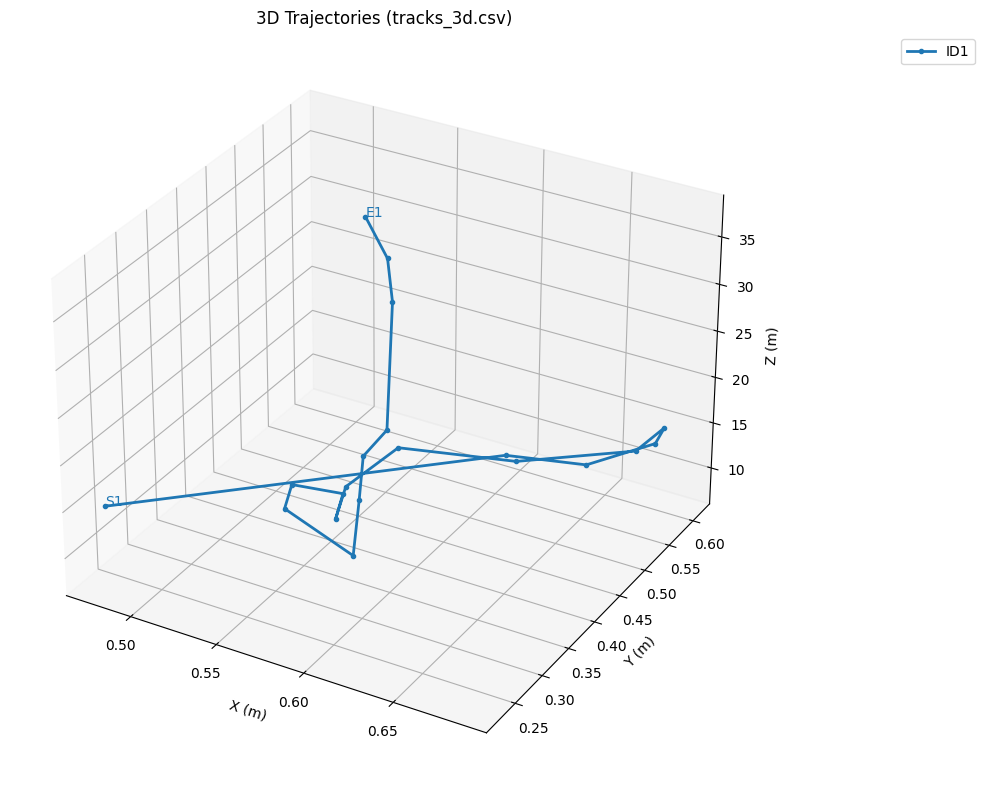

In [21]:
# Cell A: 3D trajectory plot
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

CSV_PATH = "/kaggle/working/tracks_3d.csv"   # change if needed
OUT_PLOT = "/kaggle/working/tracks_3d_plot.png"

# load
df = pd.read_csv(CSV_PATH)
if df.empty:
    raise RuntimeError(f"No rows in {CSV_PATH}")

# Convert columns to numeric if needed
for c in ['X','Y','Z','frame','track_id']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Prepare figure
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("3D Trajectories (tracks_3d.csv)")
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")

# group by track id
tracks = sorted(df['track_id'].unique())
cmap = cm.get_cmap('tab20', max(1,len(tracks)))

for i, tid in enumerate(tracks):
    tdf = df[df['track_id'] == tid].sort_values('frame')
    X = tdf['X'].values
    Y = tdf['Y'].values
    Z = tdf['Z'].values
    # skip empty
    if len(X) == 0:
        continue
    ax.plot(X, Y, Z, marker='o', linewidth=2, markersize=3, label=f"ID{int(tid)}", color=cmap(i))
    # mark start/end
    ax.text(X[0], Y[0], Z[0], f"S{int(tid)}", color=cmap(i))
    ax.text(X[-1], Y[-1], Z[-1], f"E{int(tid)}", color=cmap(i))

ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.savefig(OUT_PLOT, dpi=200, bbox_inches='tight')
print("Saved 3D plot to:", OUT_PLOT)
plt.show()


In [22]:
# ========================================================
# 3D ANIMATION VIDEO FROM tracks_3d.csv
# ========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter
from mpl_toolkits.mplot3d import Axes3D

CSV_PATH = "/kaggle/working/tracks_3d.csv"
OUTPUT_VIDEO = "/kaggle/working/track3d_animation.mp4"

# Load tracking data
df = pd.read_csv(CSV_PATH)

# Choose which ID to animate
track_id = 1  

track = df[df.track_id == track_id].sort_values("frame")

if track.empty:
    raise ValueError(f"No rows found for track_id={track_id}")

X = track["X"].values
Y = track["Y"].values
Z = track["Z"].values

# Set up figure
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.set_title(f"3D Motion of Track ID {track_id}")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# MP4 writer
writer = FFMpegWriter(fps=15)
print("Saving 3D video to:", OUTPUT_VIDEO)

with writer.saving(fig, OUTPUT_VIDEO, dpi=120):
    for i in range(len(X)):
        ax.clear()

        # Past trajectory up to frame i
        ax.plot(X[:i+1], Y[:i+1], Z[:i+1], color="blue", linewidth=2)

        # Current position
        ax.scatter(X[i], Y[i], Z[i], color="red", s=60, label="Current Position")

        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        ax.set_title(f"3D Trajectory - Frame {i+1}/{len(X)}")

        # Rotate camera slowly
        ax.view_init(elev=20, azim=2*i)

        writer.grab_frame()

plt.close()
print("🎥 Video saved successfully:", OUTPUT_VIDEO)


Saving 3D video to: /kaggle/working/track3d_animation.mp4
🎥 Video saved successfully: /kaggle/working/track3d_animation.mp4
